# 6.4 - Supervised Machine Learning
1- Importing Libraries and Databases
2- Cleaning Data
3- Prep for regression analysis
4- Regression Analysis

1- Importing Libraries and Databases

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = "C:/Users/kenwh/Achievement 6"

In [6]:
df= pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'with_states_added.cvc'))

# Clean/Check Data

In [8]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Age', 'Gender', 'Body Mass Index',
       'Number of Children', 'Smoker', 'Region of USA', 'Expenses',
       'Random_State'],
      dtype='object')

In [10]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Age,Gender,Body Mass Index,Number of Children,Smoker,Region of USA,Expenses,Random_State
0,0,0,19,female,27.900,0,yes,southwest,16884.92400,Arizona
1,1,1,18,male,33.770,1,no,southeast,1725.55230,Alabama
2,2,2,28,male,33.000,3,no,southeast,4449.46200,Arkansas
3,3,3,33,male,22.705,0,no,northwest,21984.47061,Alaska
4,4,4,32,male,28.880,0,no,northwest,3866.85520,Idaho
5,5,5,31,female,25.740,0,no,southeast,3756.62160,Florida
6,6,6,46,female,33.440,1,no,southeast,8240.58960,Georgia
7,7,7,37,female,27.740,3,no,northwest,7281.50560,Iowa
8,8,8,37,male,29.830,2,no,northeast,6406.41070,Connecticut
9,9,9,60,female,25.840,0,no,northwest,28923.13692,Minnesota


In [11]:
columns_to_remove = ['Unnamed: 0.1', 'Unnamed: 0']
df = df.drop(columns=columns_to_remove)

In [12]:
df.head(10)

,Age,Gender,Body Mass Index,Number of Children,Smoker,Region of USA,Expenses,Random_State
0,19,female,27.900,0,yes,southwest,16884.92400,Arizona
1,18,male,33.770,1,no,southeast,1725.55230,Alabama
2,28,male,33.000,3,no,southeast,4449.46200,Arkansas
3,33,male,22.705,0,no,northwest,21984.47061,Alaska
4,32,male,28.880,0,no,northwest,3866.85520,Idaho
5,31,female,25.740,0,no,southeast,3756.62160,Florida
6,46,female,33.440,1,no,southeast,8240.58960,Georgia
7,37,female,27.740,3,no,northwest,7281.50560,Iowa
8,37,male,29.830,2,no,northeast,6406.41070,Connecticut
9,60,female,25.840,0,no,northwest,28923.13692,Minnesota


In [13]:
df.shape

(1337, 8)

In [14]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Age                   0
Gender                0
Body Mass Index       0
Number of Children    0
Smoker                0
Region of USA         0
Expenses              0
Random_State          0
dtype: int64

Check for Duplicates

In [15]:
dups = df.duplicated()


In [16]:
dups.shape # No dups

(1337,)

Check for extreme values

C:\Users\kenwh\AppData\Local\Temp\ipykernel_32492\1032870975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Expenses'], bins=25) # Shows extreme values
C:\Users\kenwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Expenses', ylabel='Density'>

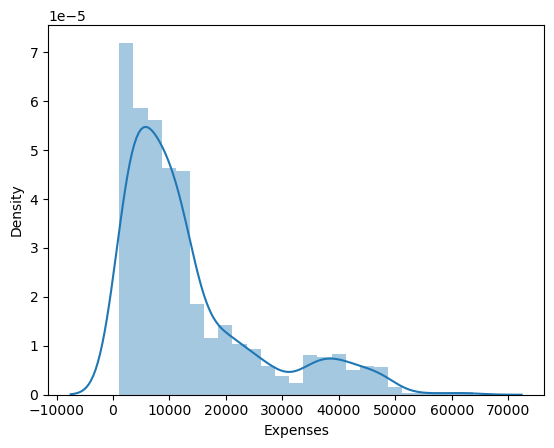

In [18]:
sns.distplot(df['Expenses'], bins=25) # Shows extreme values

No extreme values that need to be adressed

In [19]:
# Calculate mean, median, and maximum of the 'Expenses' column
mean_expenses = df['Expenses'].mean()
median_expenses = df['Expenses'].median()
max_expenses = df['Expenses'].max()

# Print the results
print("Mean Expenses:", mean_expenses)
print("Median Expenses:", median_expenses)
print("Maximum Expenses:", max_expenses)

Mean Expenses: 13279.121486655948
Median Expenses: 9386.1613
Maximum Expenses: 63770.42801


3. Data prep for regression analysis

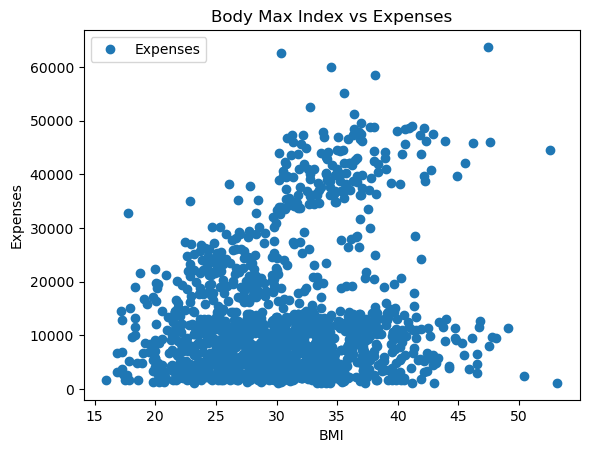

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Body Mass Index', y='Expenses',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Body Max Index vs Expenses')  
plt.xlabel('BMI')  
plt.ylabel('Expenses')  
plt.show()

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Body Mass Index'].values.reshape(-1,1)
y = df['Expenses'].values.reshape(-1,1)

In [24]:
X

array([[27.9 ],
       [33.77],
       [33.  ],
       ...,
       [36.85],
       [25.8 ],
       [29.07]])

In [25]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [26]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4- Conduct Regression Analysis

In [28]:
# Create a regression object.

regression = LinearRegression() 
# This is the regression object, which will be fit onto the training set.

In [29]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

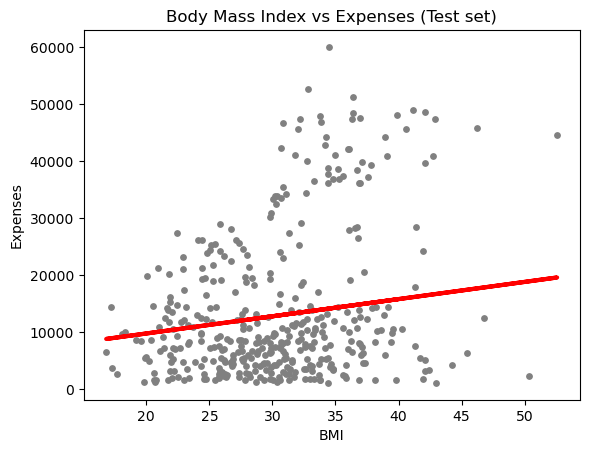

In [31]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Body Mass Index vs Expenses (Test set)')
plot_test.xlabel('BMI')
plot_test.ylabel('Expenses')
plot_test.show()

In [32]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [33]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[301.18863244]]
Mean squared error:  154131658.7511644
R2 score:  0.05879287466812988


In [34]:
y_predicted

array([[15772.62039644],
       [12625.19918748],
       [13221.55267971],
       [12890.24518403],
       [ 9215.74386831],
       [ 9101.29218798],
       [11705.06791539],
       [ 9742.82397507],
       [11533.3903949 ],
       [14766.6503641 ],
       [13155.29118057],
       [11929.45344656],
       [13250.16559979],
       [12757.72218576],
       [11580.07463293],
       [18953.17235496],
       [11876.74543588],
       [13564.90772068],
       [ 8843.77590725],
       [13707.97232109],
       [13221.55267971],
       [12423.40280375],
       [12935.42347889],
       [13221.55267971],
       [13950.4291702 ],
       [15024.16664484],
       [ 8986.84050766],
       [13387.20642755],
       [11531.88445174],
       [14509.13408337],
       [12420.39091743],
       [16700.28138434],
       [10435.55782968],
       [15013.6250427 ],
       [ 9959.67979043],
       [13817.90617193],
       [15275.65915292],
       [14742.55527351],
       [ 9673.55058961],
       [13808.87051296],


In [35]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(25)

,Actual,Predicted
0,1633.96180,15772.620396
1,8547.69130,12625.199187
2,9290.13950,13221.552680
3,32548.34050,12890.245184
4,9644.25250,9215.743868
5,2680.94930,9101.292188
6,2198.18985,11705.067915
7,1241.56500,9742.823975
8,2710.82855,11533.390395
9,12235.83920,14766.650364


Compare how the regression fits the training set

In [36]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [37]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [38]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[301.18863244]]
Mean squared error:  135599557.42526153
R2 score:  0.02444033897433817


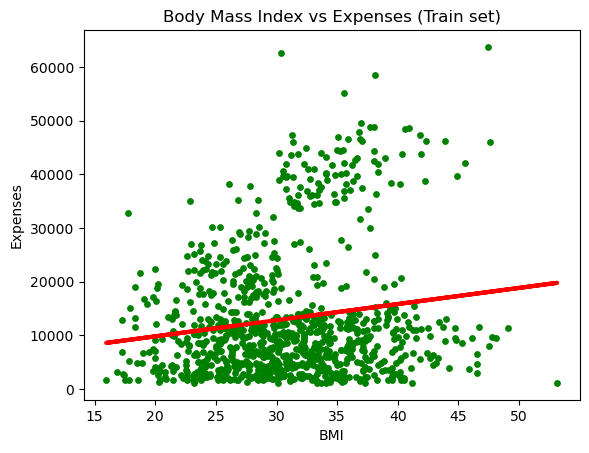

In [39]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Body Mass Index vs Expenses (Train set)')
plot_test.xlabel('BMI')
plot_test.ylabel('Expenses')
plot_test.show()

# Analysis
Test Set Data
Test Slope: [[301.18863244]]
Mean squared error:  154131658.7511644
R2 score:  0.05879287466812988


Train Set Data
Slope: [[301.18863244]]
Mean squared error:  135599557.42526153
R2 score:  0.02444033897433817

Based off this data, it shows that the regression line in this case is a pretty bad representation of the data.  We have a very high MSE (154131658), a R2 score of only 6%, and we can see that predicted numbers are far away from the actual numbers. All these indicators combine to prove that the regression line is not a good fit, and more analysis needs to be done to determine why or see if a different variable instead of BMI would be a better fit for a regression line. 

In addition, the train set data also shows similar results, and in fact even has a worse R2 (2.4%). This confirms the inaccuracy of our model. This means we can thoroughly disprove our hypothesis that I"f you have a high BMI, then you are more likely to have higher expenses."